# Importo i Dati

In [1]:
import Utilities
import pandas as pd
import nltk, string
import pandasql as pds
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import spacy
from spacy import displacy
from copy import deepcopy
from Utilities import SchemaDoc
from random import random
import seaborn as sns; sns.set_theme()

import networkx as nx
from pulp import *

In [2]:
A = pd.read_csv('movies/rotten_tomatoes.csv').astype(str)
B = pd.read_csv('movies/imdb.csv').astype(str)
Gold_Standard_GMT=pd.read_csv('movies/Movie_MTGS.csv').astype(str)


In [6]:
Gold_Standard_GMT.sort_values('GAT')

,GAT,SOURCE,LAT,SLAT
0,Filming_Locations,2,Filming Locations,2_Filming Locations
34,Id,6,Id,6_Id
33,Id,2,Id,2_Id
1,RatingCount,2,RatingCount,2_RatingCount
2,ReviewCount,2,ReviewCount,2_ReviewCount
...,...,...,...,...
23,movie_year,3,Year,3_Year
22,movie_year,2,Year,2_Year
21,movie_year,1,year,1_year
20,movie_year,0,year,0_year


In [3]:
#Snellisco i dataset per l'analisi
A.columns, B.columns

(Index(['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors',
        'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount',
        'ReviewCount', 'Genre', 'Filming Locations', 'Description'],
       dtype='object'),
 Index(['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast',
        'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url',
        'Description'],
       dtype='object'))

In [4]:
# Va implementato un sampling delle tuple complete per snellire l'analisi e aggiungere casualità

# sA = Utilities.sampleDF_clean(A, 120)
# sB = Utilities.sampleDF_clean(B, 120)

In [5]:
A.columns, B.columns

(Index(['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors',
        'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount',
        'ReviewCount', 'Genre', 'Filming Locations', 'Description'],
       dtype='object'),
 Index(['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast',
        'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url',
        'Description'],
       dtype='object'))

In [6]:
def preprocessing(cell):
    cell = cell.replace("nan", '')
    cell = cell.replace("NaN", '')
    cell = cell.strip()
    #cerca di rimuovere le stop words
    return cell

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
#set(stopwords.words('english'))


text = "Nick likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['Nick', 'likes', 'play', 'football', ',', 'however', 'fond', 'tennis', '.']


In [8]:
def preprocessingNLTK(cell):
    cell = cell.replace("nan", '')
    cell = cell.replace("NaN", '')
    cell = cell.strip()
    #cerca di rimuovere le stop words
    cell_tokens = word_tokenize(cell)
    cell_tokens_wo_sw = [word for word in cell_tokens if word not in stopwords.words()]
    #return ' '.join(cell_tokens_wo_sw)
    return cell

In [9]:
text = "Nick likes to play football, however he is not too fond of tennis."
tokens = word_tokenize(text)
fil_tokens = [word for word in tokens if word not in stopwords.words()]
' '.join(fil_tokens)

'Nick likes play football , however fond tennis .'

In [10]:
Utilities.preprocessingNLTK(text)

'Nick likes play football , however fond tennis .'

In [11]:
text = "Nick likes to play football, however he is not too fond of tennis."
tokens = word_tokenize(text)
fil_tokens = [word for word in tokens if word ]
' '.join(fil_tokens)

'Nick likes to play football , however he is not too fond of tennis .'

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 

In [12]:
def preprocessingSpacy(cell, nlp = spacy.load('en_core_web_sm')):
    cell = cell.replace("nan", '')
    cell = cell.replace("NaN", '')
    cell = cell.strip()

    nlpcell = nlp(cell)
    #cerca di rimuovere le stop words
    return cell

In [13]:
#preprocessing con stop words e normalizzazione (lemmarization e stemming)

In [14]:
doc_A = Utilities.dataframeInDocs(A, True)
doc_B = Utilities.dataframeInDocs(B, True)


Creato dict di documenti con 17 attributi: ['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors', 'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount', 'ReviewCount', 'Genre', 'Filming Locations', 'Description']
Creato dict di documenti con 13 attributi: ['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast', 'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url', 'Description']


In [15]:
sA = Utilities.sampleDF_clean(A, 120)
sA1 = Utilities.sampleDF_clean(A, 120)
sB = Utilities.sampleDF_clean(B, 120)

In [8]:
#carico il modello fuori
nlp = spacy.load("en_vectors_web_lg")

In [9]:
sda = Utilities.SchemaDoc(sA, sep='. ', verbose=True, nlp=nlp, pre=False)

NameError: name 'sA' is not defined

In [17]:
sda1 = Utilities.SchemaDoc(sA1, sep='. ', verbose=True, nlp=nlp, pre=False)

Creation doc Id
Creation doc Name
Creation doc Year
Creation doc Release Date
Creation doc Director
Creation doc Creator
Creation doc Actors
Creation doc Cast
Creation doc Language
Creation doc Country
Creation doc Duration
Creation doc RatingValue
Creation doc RatingCount
Creation doc ReviewCount
Creation doc Genre
Creation doc Filming Locations
Creation doc Description
Fine SchemaDoc


In [18]:
sdb = Utilities.SchemaDoc(sB, sep='. ', verbose=True, nlp=nlp, pre=False)

Creation doc Id
Creation doc Name
Creation doc YearRange
Creation doc ReleaseDate
Creation doc Director
Creation doc Creator
Creation doc Cast
Creation doc Duration
Creation doc RatingValue
Creation doc ContentRating
Creation doc Genre
Creation doc Url
Creation doc Description
Fine SchemaDoc


In [19]:
sda.Id.n_celle

120

In [25]:
dictA = sda.getDictDocumenti()

In [26]:
dictA['Cast'].n_celle

120

In [27]:
dictA

{'Id': <Utilities.Doc at 0x7f8e98dac9e8>,
 'Name': <Utilities.Doc at 0x7f8e98db2080>,
 'Year': <Utilities.Doc at 0x7f8e98db2278>,
 'Release Date': <Utilities.Doc at 0x7f8e9636b6d8>,
 'Director': <Utilities.Doc at 0x7f8e9636b668>,
 'Creator': <Utilities.Doc at 0x7f8e9636ba90>,
 'Actors': <Utilities.Doc at 0x7f8e9636b550>,
 'Cast': <Utilities.Doc at 0x7f8e9636ba58>,
 'Language': <Utilities.Doc at 0x7f8e9636b588>,
 'Country': <Utilities.Doc at 0x7f8e9636b4a8>,
 'Duration': <Utilities.Doc at 0x7f8e9636b898>,
 'RatingValue': <Utilities.Doc at 0x7f8e9636b3c8>,
 'RatingCount': <Utilities.Doc at 0x7f8e9636b9b0>,
 'ReviewCount': <Utilities.Doc at 0x7f8e9636bf98>,
 'Genre': <Utilities.Doc at 0x7f8e9636b9e8>,
 'Filming Locations': <Utilities.Doc at 0x7f8e9636bef0>,
 'Description': <Utilities.Doc at 0x7f8e9636b978>}

In [28]:
sdb

['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast', 'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url', 'Description']

In [29]:
def similaritySchemadocs(sda:SchemaDoc, sdb:SchemaDoc):
    DA=pd.DataFrame({'A': sda.docs_})
    DB=pd.DataFrame({'B': sdb.docs_})
    PCC = DA.assign(key=1).merge(DB.assign(key=1), on='key').drop('key', 1)
    PCC.columns=['A','B']

    ls = []
    for tup in PCC.itertuples():
        a = tup[1]
        b = tup[2]
        ls.append(getattr(sda, a).nlp.similarity(getattr(sdb, b).nlp))

    PCC['sim'] = ls

    return PCC

In [23]:
PCC = Utilities.similaritySchemadocs(sda, sdb)
PCC1= Utilities.similaritySchemadocs(sda, sda1)
#PCC.loc[PCC['sim']>0.7]

In [24]:
Utilities.toSimMatrix(PCC.loc[(PCC['sim']>0.7)])

A,Id,Name,Year,Release Date,Director,Creator,Actors,Cast,Duration,RatingValue,RatingCount,Genre,Filming Locations,Description
B,,,,,,,,,,,,,,
Id,0.994010,0.812484,0.824104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954562,NaN,NaN,NaN
Name,0.770351,0.993788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700282,0.755108,NaN,0.905226
RatingValue,0.999255,0.769343,0.824896,NaN,NaN,NaN,NaN,NaN,NaN,0.701375,0.964801,NaN,NaN,NaN
ContentRating,0.706065,0.826682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778435,NaN,0.757962
Genre,NaN,0.755112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968821,NaN,0.722448
Description,NaN,0.929076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756097,NaN,0.990319
YearRange,NaN,NaN,0.884463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseDate,NaN,NaN,0.800233,0.800775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,NaN,NaN,NaN,NaN,0.985871,0.987313,0.949797,0.897475,NaN,NaN,NaN,NaN,0.742467,NaN


In [25]:
Utilities.toSimMatrix(PCC.loc[(PCC['sim']>0.7)])

A,Id,Name,Year,Release Date,Director,Creator,Actors,Cast,Duration,RatingValue,RatingCount,Genre,Filming Locations,Description
B,,,,,,,,,,,,,,
Id,0.994010,0.812484,0.824104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954562,NaN,NaN,NaN
Name,0.770351,0.993788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700282,0.755108,NaN,0.905226
RatingValue,0.999255,0.769343,0.824896,NaN,NaN,NaN,NaN,NaN,NaN,0.701375,0.964801,NaN,NaN,NaN
ContentRating,0.706065,0.826682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778435,NaN,0.757962
Genre,NaN,0.755112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968821,NaN,0.722448
Description,NaN,0.929076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.756097,NaN,0.990319
YearRange,NaN,NaN,0.884463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseDate,NaN,NaN,0.800233,0.800775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,NaN,NaN,NaN,NaN,0.985871,0.987313,0.949797,0.897475,NaN,NaN,NaN,NaN,0.742467,NaN


Il separatore del ';' ha migliorato la similarità degli Id. Senza peggiorare troppo le altre.<br>
Il separatore del '.' ha migliorato ancora di più la similarità degli Id Senza peggiorare troppo le altre.
La rimozione delle stop words non ha dato modifiche significative all'analisi

In [32]:
#Credo che stare sul modello medio sia sufficente in quanto dovendo ridurre i dati per poter analizzare i risultati non migliorano molto. Bisogna tentare la pulizia dei documenti delle stop words e la normalizzazione per vedere se l'analisi si velocizza e implementare il sampling casuale degli elementi completi

In [33]:
Utilities.toSimMatrix(PCC)


A,Id,Name,Year,Release Date,Director,Creator,Actors,Cast,Language,Country,Duration,RatingValue,RatingCount,ReviewCount,Genre,Filming Locations,Description
B,,,,,,,,,,,,,,,,,
Id,0.996920,0.809716,0.810561,0.613157,0.628033,0.546370,0.430231,0.362329,0.666281,0.677331,0.635520,0.687664,0.971219,0.671863,0.652807,0.571098,0.536816
Name,0.808531,0.992831,0.686613,0.625631,0.668696,0.634268,0.545010,0.504151,0.712738,0.711611,0.555083,0.529689,0.761416,0.644821,0.753448,0.717055,0.875741
YearRange,0.498289,0.414129,0.872528,0.666797,0.260440,0.229750,0.169828,0.157288,0.330873,0.388156,0.430939,0.419977,0.505937,0.502109,0.434199,0.356905,0.331946
ReleaseDate,0.674858,0.686300,0.792793,0.795950,0.453044,0.479746,0.426451,0.448785,0.586793,0.645460,0.612745,0.545493,0.660603,0.614608,0.644510,0.673800,0.594951
Director,0.591834,0.669394,0.469498,0.488848,0.991987,0.979376,0.926816,0.863724,0.639500,0.688522,0.381861,0.350953,0.576892,0.462310,0.534150,0.725411,0.457729
Creator,0.468847,0.590708,0.377375,0.446173,0.946486,0.991880,0.979516,0.961366,0.601831,0.663908,0.300512,0.256832,0.453727,0.390511,0.545357,0.765131,0.433833
Cast,0.322061,0.501083,0.271906,0.389849,0.831266,0.934294,0.968998,0.997907,0.537316,0.603558,0.203917,0.153327,0.303224,0.300826,0.543541,0.774183,0.419310
Duration,0.535373,0.489116,0.525273,0.646333,0.332129,0.293804,0.217095,0.193647,0.452542,0.429587,0.890322,0.525478,0.555960,0.524424,0.378612,0.385683,0.350928
RatingValue,0.996706,0.782942,0.816362,0.613040,0.590587,0.505628,0.386682,0.320531,0.650498,0.659162,0.652599,0.705893,0.973847,0.673706,0.636303,0.543458,0.505253


<AxesSubplot:xlabel='A', ylabel='B'>

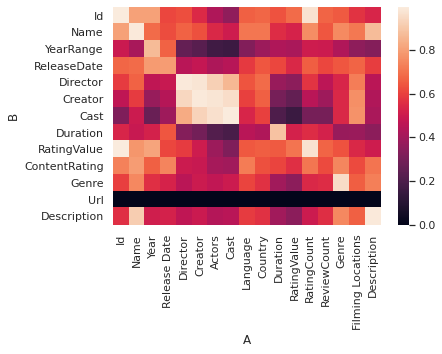

In [34]:
sns.heatmap(Utilities.toSimMatrix(PCC))

<AxesSubplot:xlabel='A', ylabel='B'>

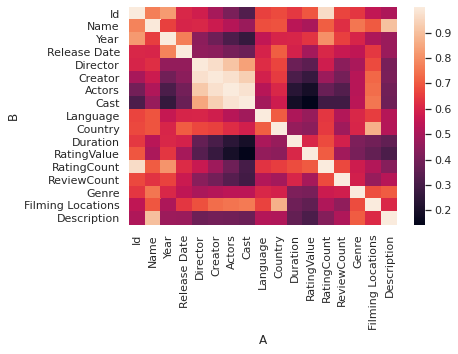

In [26]:
sns.heatmap(Utilities.toSimMatrix(PCC1))

In [27]:
len(set(sda.Name.nlp.vocab))

5380

In [28]:
len(sda.Name.nlp)

506

In [38]:
nlp=spacy.load("en_core_web_md")
doc = nlp("We all live in a yellow submarine yellow submarine")

In [39]:
len(set([w.text for w in doc]))/len([w.text for w in doc])

0.7777777777777778

In [40]:
type(doc)

spacy.tokens.doc.Doc

In [41]:
sda.Id.media_token_per_cella, sda.Name.media_token_per_cella, sda.Description.media_token_per_cella

(0.9916666666666667, 2.925, 28.275)

In [42]:
sda.Id.lexicalRichness, sda.Name.lexicalRichness, sda.Description.lexicalRichness

(1.0083333333333333, 0.7329545454545454, 0.427224513847967)

In [43]:
sdb.Id.media_token_per_cella, sdb.Name.media_token_per_cella, sdb.Description.media_token_per_cella

(1.0416666666666667, 2.5833333333333335, 177.425)

In [44]:
sdb.Id.lexicalRichness, sdb.Name.lexicalRichness, sdb.Description.lexicalRichness

(0.9920634920634921, 0.77491961414791, 0.2673304527522074)

In [37]:
#funziona solo se si è fatto il preprocessing
#len(sdb.Description.text), len(sdb.Description.text_clean)

## Implementazione Matching a massima similarità totale e stable marriage

### Top 1

In [36]:
top1 = Utilities.Top1(PCC)
top1

,A,B,sim
8,Id,RatingValue,0.999255
97,Cast,Cast,0.998421
14,Name,Name,0.993788
70,Creator,Creator,0.990362
220,Description,Description,0.990319
192,Genre,Genre,0.968821
137,Duration,Duration,0.889113
28,Year,YearRange,0.884463
42,Release Date,ReleaseDate,0.800775


In [49]:
set(sda.docs_) - set(top1.A), set(sdb.docs_) - set(top1.B)

({'Actors',
  'Country',
  'Filming Locations',
  'Language',
  'RatingCount',
  'RatingValue',
  'ReviewCount'},
 {'ContentRating', 'RatingValue', 'Url'})

In [33]:
Utilities.Top1(PCC1)

,A,B,sim
0,Id,Id,1.000000
198,RatingValue,RatingValue,0.999617
162,Country,Country,0.999500
144,Language,Language,0.999466
126,Cast,Cast,0.999365
180,Duration,Duration,0.999276
54,Release Date,Release Date,0.999262
288,Description,Description,0.998744
234,ReviewCount,ReviewCount,0.998609
216,RatingCount,RatingCount,0.998530


### Top k

In [35]:
#Utilities.TopK(PCC, 2, 'A')

### Stable Marriage

In [61]:
SM = Utilities.StableMarriage(PCC, 0.35, True)
SM

,A,B,sim
0,Cast,Cast,0.997907
1,Id,Id,0.996920
2,Name,Name,0.992831
3,Director,Director,0.991987
4,Creator,Creator,0.991880
5,Description,Description,0.991355
6,RatingCount,RatingValue,0.973847
7,Genre,Genre,0.955723
8,Duration,Duration,0.890322
9,Year,YearRange,0.872528


In [29]:
SM1 = Utilities.StableMarriage(PCC1, 0.75, True); SM1

,A,B,sim
0,Id,Id,1.000000
1,RatingValue,RatingValue,0.999617
2,Country,Country,0.999500
3,Language,Language,0.999466
4,Cast,Cast,0.999365
5,Duration,Duration,0.999276
6,Release Date,Release Date,0.999262
7,Description,Description,0.998744
8,ReviewCount,ReviewCount,0.998609
9,RatingCount,RatingCount,0.998530
